In [145]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.impute import SimpleImputer

# Exploratory Data Analysis and Data Cleaning

In [ ]:
# read the data
dataset=pd.read_csv('/content/kidney_disease.csv')
# dataset = pd.read_csv(r"D:\Downloads\Machine_Learning_Projects\CKD_prediction\dataset\kidney_disease.csv")


In [147]:
dataset.head(2)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.02,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd


In [148]:
dataset.shape

(400, 26)

In [149]:
# check fro missing values
(dataset.isnull().sum().sort_values(ascending=False)/dataset.shape[0])*100
# dataset.isnull().sum().sort_values(ascending=False)

rbc               38.00
rc                32.50
wc                26.25
pot               22.00
sod               21.75
pcv               17.50
pc                16.25
hemo              13.00
su                12.25
sg                11.75
al                11.50
bgr               11.00
bu                 4.75
sc                 4.25
bp                 3.00
age                2.25
pcc                1.00
ba                 1.00
dm                 0.50
htn                0.50
cad                0.50
appet              0.25
ane                0.25
pe                 0.25
id                 0.00
classification     0.00
dtype: float64

In [150]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [151]:
# There are 24 features

In [152]:
dataset.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [153]:
# now check target column
dataset['classification'].value_counts()

classification
ckd       248
notckd    150
ckd\t       2
Name: count, dtype: int64

In [154]:
#ckd\t mis treat due to tab space

In [155]:
# remove ckd\t means tab space using strip
dataset['classification']=dataset['classification'].str.strip()

In [156]:
dataset['classification'].value_counts()

classification
ckd       250
notckd    150
Name: count, dtype: int64

In [157]:
dataset['classification'].unique()

array(['ckd', 'notckd'], dtype=object)

In [158]:
dataset['classification'].nunique()

2

In [159]:
# now check data types
dataset.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [160]:
# pd.set_option('display.max_columns',26)

In [161]:
dataset.head(5)

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [162]:
# as pcv,wc and rc actually numerical but given object datatype
cols=['pcv','wc','rc']
for col in cols:
  dataset[col]=pd.to_numeric(dataset[col],errors='coerce')


In [163]:
# now again check data types
dataset.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv               float64
wc                float64
rc                float64
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [164]:
# now dtypes of pcv,wc,rc are float64 means numerical

In [165]:
dataset.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


In [166]:
# drop id as no need
dataset.drop(columns='id',inplace=True)

# Preprocessing

In [167]:
# replace ckd with 1 and notckd with 0 means label encoding
# dataset['classification']=dataset['classification'].replace({"ckd":1,"notckd":0})
dataset['classification']=dataset['classification'].map({"ckd":1,"notckd":0})

**` Now separate features and target(output)`**

In [168]:
x=dataset.drop(columns='classification')

In [169]:
x

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,15.4,44.0,7800.0,5.2,yes,yes,no,good,no,no
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,11.3,38.0,6000.0,NaN,no,no,no,good,no,no
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,9.6,31.0,7500.0,NaN,no,yes,no,poor,no,yes
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,11.2,32.0,6700.0,3.9,yes,no,no,poor,yes,yes
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,11.6,35.0,7300.0,4.6,no,no,no,good,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,15.7,47.0,6700.0,4.9,no,no,no,good,no,no
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,16.5,54.0,7800.0,6.2,no,no,no,good,no,no
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,15.8,49.0,6600.0,5.4,no,no,no,good,no,no
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,14.2,51.0,7200.0,5.9,no,no,no,good,no,no


**`1-------> ckd`**
**`0------->notckd`**



In [170]:
y=dataset['classification']
# y=dataset.iloc[:,-1]

In [171]:
y

0      1
1      1
2      1
3      1
4      1
      ..
395    0
396    0
397    0
398    0
399    0
Name: classification, Length: 400, dtype: int64

**`Train test split`**



In [172]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,stratify=y,test_size=.20)

In [173]:
x.shape,x_train.shape,x_test.shape

((400, 24), (320, 24), (80, 24))

In [174]:
y.shape,y_train.shape,y_test.shape

((400,), (320,), (80,))

In [175]:
# now separate numerical and categorical features
num_features=x.select_dtypes(include='number').columns.to_list()
print(num_features)
print("\n**--------------------------------------------------------------------------------------**\n")
cat_features=x.select_dtypes(include='object').columns.to_list()
print(cat_features)

['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']

**--------------------------------------------------------------------------------------**

['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']


**`Now make transformer for cat and numerical features`**

In [176]:
num_transformer=Pipeline([
   ( 'impute',SimpleImputer(strategy='mean')),
    ('scaler',StandardScaler())
])

cat_transformer=Pipeline([
   ( 'impute',SimpleImputer(strategy='most_frequent')),
    ('encoder',OneHotEncoder(handle_unknown='ignore'))
])

# now combine both transformer and make final preprocessor
preprocessor=ColumnTransformer([
    ('num',num_transformer,num_features),
    ('cat',cat_transformer,cat_features)
])

# Model training and Evaluation

In [177]:
# now combine preprocessor and model to get final pipeline
pipeline=Pipeline([
    ('preprocessor',preprocessor),
  ('model',RandomForestClassifier(random_state=42))
])

In [178]:
# now train the model
pipeline.fit(x_train,y_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [179]:
pipeline.score(x_train,y_train)*100,pipeline.score(x_test,y_test)*100

(100.0, 100.0)

**`Now evaluate the model`**

In [180]:
y_pred=pipeline.predict(x_test);

In [181]:
y

0      1
1      1
2      1
3      1
4      1
      ..
395    0
396    0
397    0
398    0
399    0
Name: classification, Length: 400, dtype: int64

In [182]:
# print confusion matrix to analyse
cm=confusion_matrix(y_test,y_pred)
print(cm)
# sns.heatmap(cm, annot=True,cmap='Blues',square=True,linecolor='black',linewidth=2,cbar=False)
# plt.xlabel("Predicted label")
# plt.ylabel("True label")
# plt.title("Confusion Matrix")
# plt.show()

[[30  0]
 [ 0 50]]


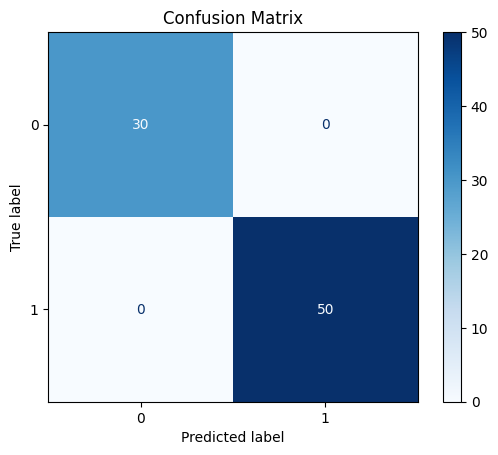

In [183]:
# display confusion

ConfusionMatrixDisplay.from_estimator(pipeline,x_test,y_test,cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [184]:
model=RandomForestClassifier(random_state=42);


In [185]:
print(f"The accuracy_score of {model} = ",accuracy_score(y_test,y_pred)*100)
print(f"\nThe precision_score of {model} = ",precision_score(y_test,y_pred)*100)
print(f"\nThe recall_score of {model} = ",recall_score(y_test,y_pred)*100)
print(f"\nThe f1_score of {model} = ",f1_score(y_test,y_pred)*100)
print(f"\nThe cross_val_score of {model} = ",cross_val_score(pipeline,x,y)*100)
print(f"\nThe mean cross_val_score of {model} = ",cross_val_score(pipeline,x,y).mean()*100)

The accuracy_score of RandomForestClassifier(random_state=42) =  100.0

The precision_score of RandomForestClassifier(random_state=42) =  100.0

The recall_score of RandomForestClassifier(random_state=42) =  100.0

The f1_score of RandomForestClassifier(random_state=42) =  100.0

The cross_val_score of RandomForestClassifier(random_state=42) =  [ 98.75 100.    97.5   98.75 100.  ]

The mean cross_val_score of RandomForestClassifier(random_state=42) =  99.0


**`So the mean accuracy of model is 99%`**

In [186]:
# preprocess x and then check missing value
x_filled=pipeline.named_steps['preprocessor'].fit_transform(x)
print(pd.DataFrame(x_filled).isnull().sum().sum())
print(pd.DataFrame(x_filled).isnull().sum())

0
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
dtype: int64


In [187]:
from sklearn.compose import make_column_selector

# Get feature names after transformation
feature_names=pipeline.named_steps['preprocessor'].get_feature_names_out()

print("Number of final features:", len(feature_names))
print("Feature names:", feature_names)


Number of final features: 38
Feature names: ['num__age' 'num__bp' 'num__sg' 'num__al' 'num__su' 'num__bgr' 'num__bu'
 'num__sc' 'num__sod' 'num__pot' 'num__hemo' 'num__pcv' 'num__wc'
 'num__rc' 'cat__rbc_abnormal' 'cat__rbc_normal' 'cat__pc_abnormal'
 'cat__pc_normal' 'cat__pcc_notpresent' 'cat__pcc_present'
 'cat__ba_notpresent' 'cat__ba_present' 'cat__htn_no' 'cat__htn_yes'
 'cat__dm_\tno' 'cat__dm_\tyes' 'cat__dm_ yes' 'cat__dm_no' 'cat__dm_yes'
 'cat__cad_\tno' 'cat__cad_no' 'cat__cad_yes' 'cat__appet_good'
 'cat__appet_poor' 'cat__pe_no' 'cat__pe_yes' 'cat__ane_no' 'cat__ane_yes']


# Make Predictive system

In [188]:
# # by using dataframe concept means convert user input to dataframe if column tansformer uses features names instead of indices
user_input=(69.0,70.0,1.01,3.0,4.0,"normal","abnormal","notpresent","notpresent",264.0,87.0,2.7,130.0,4.0,12.5,37,9600,4.1,"yes","yes","yes","good","yes","no")

user_input_df=pd.DataFrame([user_input],columns=x.columns)


Prediction=pipeline.predict(user_input_df)
if(Prediction[0]==1):
  print("Patient has CKD")
else:
   print("Patient has no diabetic")


user_input_df.shape

Patient has CKD


(1, 24)

**`Now save the model`**

In [189]:
import joblib

In [190]:
# save model and feature names
ckd_bundle={
    "pipeline":pipeline,
    "features_names":x.columns.to_list()
}
joblib.dump(ckd_bundle,"ckd_model_bundle.joblib")

['ckd_model_bundle.joblib']